In [1]:
from dataset import get_cifar_train_loader, get_cifar_valid_loader
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from resnet import Encoder, BasicBlock, Decoder, Autoencoder, ResNet18

from torchmetrics.functional import recall
from torchmetrics.functional import precision
from torchmetrics.functional import f1_score

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(0)

In [3]:
batch_size = 32

train_loader = get_cifar_train_loader(batch_size)
valid_loader = get_cifar_valid_loader(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
best_encoder = torch.load("best_encoder.pt").to(device)
not_pretrained_extractor = Encoder(BasicBlock).to(device)

pretrained_resnet = ResNet18(best_encoder).to(device)
not_pretrained_resnet = ResNet18(not_pretrained_extractor).to(device)

# Training pretrained on 100%

In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(pretrained_resnet.parameters(), lr=0.0005)

In [6]:
pretrained_valid_loss = []
pretrained_recall = []
pretrained_precision = []
pretrained_f1 = []

num_epochs = 12

for epoch_ind in range(num_epochs):
    print(f"Epoch {epoch_ind}")
    
    pretrained_resnet.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = pretrained_resnet(images)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    pretrained_resnet.eval()
    valid_recall, valid_precision, valid_f1_score, valid_loss = 0, 0, 0, 0
    
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = pretrained_resnet(images)
        loss = loss_fn(outputs, labels)
        valid_loss += loss.item()
        valid_recall += recall(outputs, labels, "multiclass", num_classes=10, average="macro").item()
        valid_precision += precision(outputs, labels, "multiclass", num_classes=10, average="macro").item()
        valid_f1_score += f1_score(outputs, labels, "multiclass", num_classes=10, average="macro").item()
    
    valid_loss = valid_loss / len(valid_loader)
    pretrained_valid_loss.append(valid_loss)
    pretrained_recall.append(valid_recall / len(valid_loader))
    pretrained_precision.append(valid_precision / len(valid_loader))
    pretrained_f1.append(valid_f1_score / len(valid_loader))
    
    print(valid_loss)
        

Epoch 0
1.2405076162121929
Epoch 1
1.106353611610949
Epoch 2
0.9688476360263154
Epoch 3
0.9614313612349878
Epoch 4
0.8025702795091147
Epoch 5
0.9245027499838759
Epoch 6
0.7841265822370974
Epoch 7
0.7740628129948443
Epoch 8
0.749673695848011
Epoch 9
0.7303739636184309
Epoch 10
0.7648176128110185
Epoch 11
0.772586388805042
Epoch 12


KeyboardInterrupt: 

# Training not pretrained model on 100%

In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(not_pretrained_resnet.parameters(), lr=0.0005)

In [8]:
not_pretrained_valid_loss = []
not_pretrained_recall = []
not_pretrained_precision = []
not_pretrained_f1 = []

num_epochs = 12

for epoch_ind in range(num_epochs):
    print(f"Epoch {epoch_ind}")
    
    not_pretrained_resnet.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = not_pretrained_resnet(images)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    not_pretrained_resnet.eval()
    valid_recall, valid_precision, valid_f1_score, valid_loss = 0, 0, 0, 0
    
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = not_pretrained_resnet(images)
        loss = loss_fn(outputs, labels)
        valid_loss += loss.item()
        valid_recall += recall(outputs, labels, "multiclass", num_classes=10, average="macro").item()
        valid_precision += precision(outputs, labels, "multiclass", num_classes=10, average="macro").item()
        valid_f1_score += f1_score(outputs, labels, "multiclass", num_classes=10, average="macro").item()
    
    valid_loss = valid_loss / len(valid_loader)
    not_pretrained_valid_loss.append(valid_loss)
    not_pretrained_recall.append(valid_recall / len(valid_loader))
    not_pretrained_precision.append(valid_precision / len(valid_loader))
    not_pretrained_f1.append(valid_f1_score / len(valid_loader))
    
    print(valid_loss)
        

Epoch 0
1.2037086526806744
Epoch 1
0.9398062014922547
Epoch 2
0.8921943529726217
Epoch 3
0.7906743546073048
Epoch 4
0.7689148926506408
Epoch 5
0.7289792191677581
Epoch 6
0.7454412749019294
Epoch 7
0.7163533324631639
Epoch 8
0.7075564988409749
Epoch 9
0.7301058706384116
Epoch 10
0.7738131851243516
Epoch 11
0.749882136480496


# Plotting results

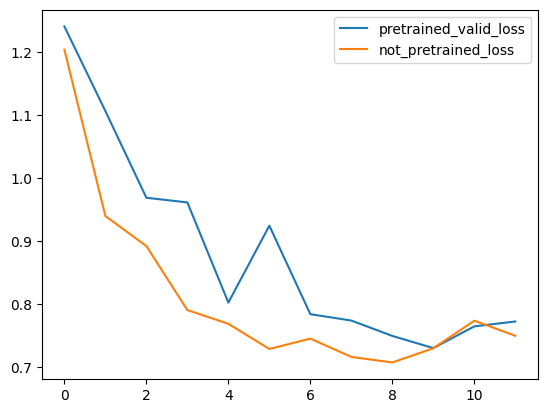

In [9]:
plt.plot(pretrained_valid_loss, label = 'pretrained_valid_loss')
plt.plot(not_pretrained_valid_loss, label = 'not_pretrained_loss')
plt.legend()

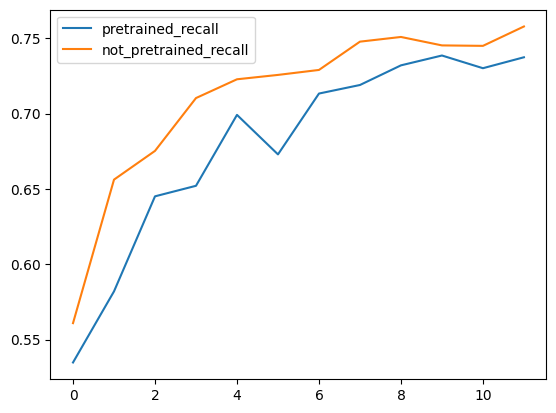

In [10]:
plt.plot(pretrained_recall, label = 'pretrained_recall')
plt.plot(not_pretrained_recall, label = 'not_pretrained_recall')
plt.legend()

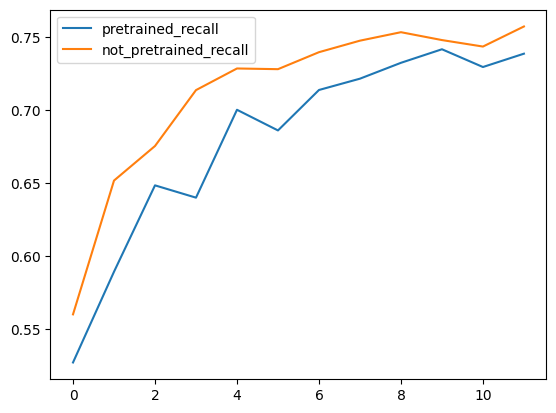

In [11]:
plt.plot(pretrained_precision, label = 'pretrained_recall')
plt.plot(not_pretrained_precision, label = 'not_pretrained_recall')
plt.legend()

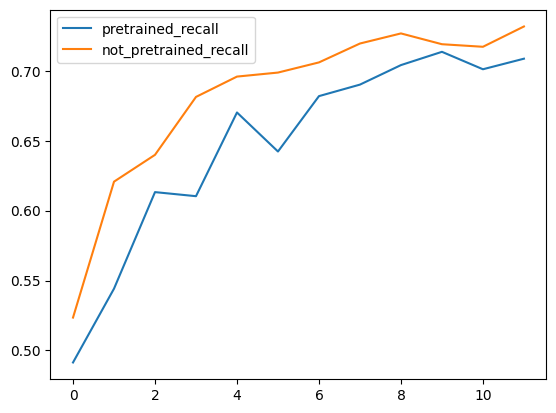

In [12]:
plt.plot(pretrained_f1, label = 'pretrained_recall')
plt.plot(not_pretrained_f1, label = 'not_pretrained_recall')
plt.legend()